# IMPORT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
from numpy.linalg import inv


# Definições globais

In [ ]:
dx_global = 0.1
dy_global = 0.1
dt_global = 0.1
L_global = 50
tmax_global = 150

# Problema

Comparar os métodos de Jacobi, Gauss-Seidel e SOR com o exemplo do potencial:
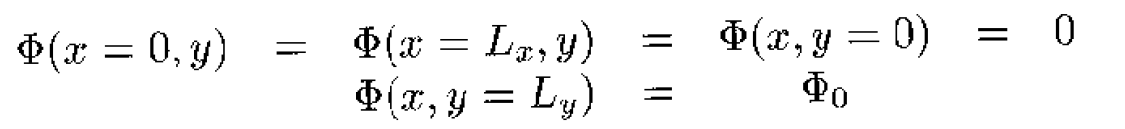

Cuja solução analítica é:

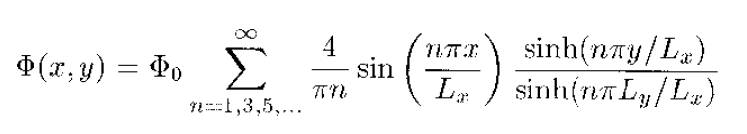

# Solução analítica

In [ ]:
L = L_global        # tamanho limite da grade x y

def phi_anal(x,y,l):
  soma = 0.0
  pi = np.pi
  for i in range(1, 200, 2):
    n_pi_lx = i*pi/l
    soma = soma + ( (4/(pi*i)) * np.sin(n_pi_lx*x) * np.sinh(n_pi_lx*y) ) / np.sinh(n_pi_lx*l)
  return soma


# Criando a matriz
P_anal = np.zeros((L+1,L+1))

for i in range(0, L+1):
  for j in range(0, L+1):
    P_anal[i][L-j] = phi_anal(i,j,L)




# iniciando a plotagem
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(L+1)
X, Y = np.meshgrid(x, y)
ax.set_title('Solução Analítica'.format(L), fontsize=20)
ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('$\Phi$ (x,y)', fontsize=17)

#ax.plot_surface(X,Y,P, cmap=cm.plasma)
ax.plot_wireframe(X, Y, P_anal, color='purple')
plt.show()

# Método Jacobi

In [ ]:
def calculoVariacaoDaSolucao(P,Q, variacao_vet, variacao_indice):
  max_variacao = 0.0
  for i in range(1,L+1):
    for j in range(1,L+1):
      if (P[i][j] != 0):
        variacao = 100*np.abs((Q[i][j] - P[i][j])/P[i][j])
        if (variacao > max_variacao):
          max_variacao = variacao
  # Fora do loop  
  variacao_vet[variacao_indice] = max_variacao
  variacao_indice = variacao_indice + 1
  return variacao_vet, variacao_indice


In [ ]:
dx = 0.1      # contador i
dy = 0.1      # contador j
dt = 0.1      # por enquanto inutilizado
L = L_global        # tamanho limite da grade x y
tmax = tmax_global

# potencial eletroestático PHI = P
P = np.zeros((L+2,L+2))
Q = np.zeros((L+2,L+2))

# condições iniciais, P[y,x]:  
for p in range(1,L+1):
  P[p][1] = 1


# Calculo da variação da solução ao longo do tempo (""ERRO"")
variacao_vet = [0.0 for i in range(int(tmax/dt)+1)]
variacao_indice = 0


# iniciando a plotagem
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(L+2)
X, Y = np.meshgrid(x, y)
ax.set_title('Solução por método Jacobi'.format(L), fontsize=20)
ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('$\Phi$ (x,y)', fontsize=17)

t = 0.0
l = 0
while t < tmax:
  Q = P.copy()
  
  for i in range(1,L+1):
    for j in range(2,L+1):    #função range vai sempre até L-1 caso eu set para L    
      Q[i][j] = (P[i+1][j] + P[i-1][j] + P[i][j+1] + P[i][j-1])/4
  
  # Variação do valor da solução
  variacao_vet, variacao_indice = calculoVariacaoDaSolucao(P,Q, variacao_vet, variacao_indice)
  

  P = Q.copy()
  t = t+dt
  l = l + 1


#ax.plot_surface(X,Y,P, cmap=cm.plasma)
ax.plot_wireframe(X[0:L,1:L-1], Y[0:L,1:L-1], P[0:L,1:L-1])
plt.show()

## Calculo da variação da solução ao decorrer das iterações

In [ ]:
def setDefaultValuesForVariation(ax):
  ax.set_title('Maior variação percentual entre o valor anterior\n e o atual no decorrer das iterações'.format(L),fontsize=20)
  ax.set_xlabel('Número da iteração',fontsize=17)
  ax.set_ylabel('Variação percentual entre o\n passo anterior e atual (%)',fontsize=17)
  plt.tick_params(labelsize=15)
  plt.grid()


In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

setDefaultValuesForVariation(ax)

plt.plot([i for i in range(len(variacao_vet))][0:],variacao_vet[0:])
plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

setDefaultValuesForVariation(ax)

ini = 0
fim = 100
plt.plot([i for i in range(len(variacao_vet))][ini:fim],variacao_vet[ini:fim])
plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

setDefaultValuesForVariation(ax)

ini = 80
fim = 400
plt.plot([i for i in range(len(variacao_vet))][ini:fim],variacao_vet[ini:fim])
plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
setDefaultValuesForVariation(ax)

ini = 400
fim = 1500
plt.plot([i for i in range(len(variacao_vet))][ini:fim],variacao_vet[ini:fim])
plt.show()

## Erro fixando o valor de X mas percorrendo Y

In [ ]:
def metodoJacobi(l_par, tmax_par, dt_par):
  dx = 0.1      # contador i
  dy = 0.1      # contador j
  dt = dt_par      # por enquanto inutilizado
  L = l_par        # tamanho limite da grade x y
  tmax = tmax_par

  # potencial eletroestático PHI = P
  P = np.zeros((L+2,L+2))
  Q = np.zeros((L+2,L+2))

  # condições iniciais, P[y,x]:  
  for p in range(1,L+1):
    P[p][1] = 1

  t = 0
  l = 0
  while t < tmax:
    Q = P.copy()
    
    for i in range(1,L+1):
      for j in range(2,L+1):    #função range vai sempre até L-1 caso eu set para L    
        Q[i][j] = (P[i+1][j] + P[i-1][j] + P[i][j+1] + P[i][j-1])/4
    
    P = Q.copy()
    t = t+dt
    l = l + 1
  return P

In [ ]:
# Veridicando o maior ERRO
def verificaMaiorErro(P, P_anal, l):
  L = l
  max = [0 for i in range(L)]

  for j in range(0, L):
    max_coluna = 0
    erro = 0.0
    for i in range(1, L-1 ):
      if (P_anal[i][j] != 0):
        erro = erro + 100*np.abs( (P[i][j+1] - P_anal[i][j]) /(P_anal[i][j]) )
        # if erro > max_coluna:
        #   max_coluna = erro
    # max[j] = max_coluna
    max[j] = erro/len(range(1, L-1))
  return max

In [ ]:
# Verificar o erro para diferentes tempos
def verificaErroComAnal(P_anal ,l_ , dt_, metodo):
  
  # DEFINIDO
  rangex = range(50,150,10)

  plots_do_erro = [1 for i in rangex]
  L = L_global
  j = 0
  for i in rangex:
    Pxx = metodo(l_par=l_, tmax_par=i, dt_par=dt_)
    plots_do_erro[j] = verificaMaiorErro(Pxx, P_anal,l=l_)
    j = j + 1
  
  return plots_do_erro


In [ ]:
def setDefaultValuesForError(ax):
  ax.set_title('Erro percentual absoluto médio entre\n a solução analítica e numérica',fontsize=20)
  ax.set_xlabel('Eixo X',fontsize=17)
  ax.set_ylabel('Valor absoluto do erro médio de todos\n os valores de $\Phi$ variando Y e fixando X',fontsize=17)
  plt.tick_params(labelsize=15)
  plt.grid()
  plt.ylim(-2, 102)


In [ ]:
plots_do_erro_jacobi = verificaErroComAnal(P_anal, l_=L_global, dt_=dt_global, metodo=metodoJacobi)

In [ ]:


# Gráfico do erro para diferentes tempos
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
setDefaultValuesForError(ax)

tamanho = len(plots_do_erro_jacobi[0])
for i in range(len(plots_do_erro_jacobi)):
  plt.plot([i for i in range(tamanho)], plots_do_erro_jacobi[i], label='Número de iterações: {}'.format((i*10+50)*10))
plt.legend()
plt.show()

# Método Gauss-Seidel

In [ ]:
# METODO GAUSS-SEIDEL, PRIMEIRO PARA EQ.LAPLACE

dx = dy = 1   # contador i para x, j para y
dt = dt_global      # utilizado para incrementar o tempo
L = L_global        # tamanho limite da grade x y
tmax = tmax_global


# Calculo da variação da solução ao longo do tempo (""ERRO"")
variacao_vet_gauss = [0.0 for i in range(int(tmax/dt)+1)]
variacao_indice = 0

# potencial eletroestático phi = P
P = np.zeros((L+2,L+2))
Q = np.zeros((L+2,L+2))

# Condição inicial
for i in range(1,L+1):
  P[i][1] = 1

# iniciando a plotagem
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(L+2)
X, Y = np.meshgrid(x, y)
ax.set_title('Solução por método Gauss-Seidel'.format(L), fontsize=20)
ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('$\Phi$ (x,y)', fontsize=17)

t = 0
l = 0
while t < tmax:
  Q = P.copy()
  for j in range(1,L+1):
    for i in range(2,L+1):    #função range() vai sempre até L-1 caso eu set para L    
      #Q[j][i] = (P[j+1][i] + P[j-1][i] + P[j][i+1] + P[j][i-1] + ((dx**2)/1)*rho(j,i))/4
      Q[j][i] = (P[j+1][i] + Q[j-1][i] + P[j][i+1] + Q[j][i-1])/4

  # Variação do valor da solução
  variacao_vet_gauss, variacao_indice = calculoVariacaoDaSolucao(P,Q, variacao_vet_gauss, variacao_indice)

  P = Q.copy()
  t = t+dt
  l = l + 1


# ax.plot_surface(X,Y,P)
# ax.plot_wireframe(X, Y, P, color='red')
ax.plot_wireframe(X[0:L,1:L-1], Y[0:L,1:L-1], P[0:L,1:L-1], color='red')
plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

setDefaultValuesForVariation(ax)

plt.plot([i for i in range(len(variacao_vet_gauss))][0:],variacao_vet_gauss[0:], color='red')

plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

setDefaultValuesForVariation(ax)

ini = 0
fim = 25
plt.plot([i for i in range(len(variacao_vet_gauss))][ini:fim],variacao_vet_gauss[ini:fim], color='red')
plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

setDefaultValuesForVariation(ax)

ini = 90
fim = 600
plt.plot([i for i in range(len(variacao_vet_gauss))][ini:fim],variacao_vet_gauss[ini:fim], color='red')
plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

setDefaultValuesForVariation(ax)

ini = 300
fim = 1500
plt.xlim(200,1600)
plt.plot([i for i in range(len(variacao_vet_gauss))][ini:fim],variacao_vet_gauss[ini:fim], color='red')
plt.show()

In [ ]:
def metedoGaussSeidel(l_par, tmax_par, dt_par):
  dx = dy = 1   # contador i para x, j para y
  dt = dt_par      # utilizado para incrementar o tempo
  L = l_par        # tamanho limite da grade x y
  tmax = tmax_par

  # Calculo da variação da solução ao longo do tempo (""ERRO"")
  variacao_vet_gauss = [0.0 for i in range(int(tmax/dt)+1)]
  variacao_indice = 0

  # potencial eletroestático phi = P
  P = np.zeros((L+2,L+2))
  Q = np.zeros((L+2,L+2))

  # Condição inicial
  for i in range(1,L+1):
    P[i][1] = 1

  t = 0
  l = 0
  while t < tmax:
    Q = P.copy()
    for j in range(1,L+1):
      for i in range(2,L+1):    #função range() vai sempre até L-1 caso eu set para L    
        #Q[j][i] = (P[j+1][i] + P[j-1][i] + P[j][i+1] + P[j][i-1] + ((dx**2)/1)*rho(j,i))/4
        Q[j][i] = (P[j+1][i] + Q[j-1][i] + P[j][i+1] + Q[j][i-1])/4

    P = Q.copy()
    t = t+dt
    l = l + 1
  
  return P

In [ ]:
plots_do_erro_gauss = verificaErroComAnal(P_anal, l_=L_global, dt_=dt_global, metodo=metedoGaussSeidel)

In [ ]:




# Gráfico do erro para diferentes tempos
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
setDefaultValuesForError(ax)

plt.ylim(-2,50.2)

tamanho = len(plots_do_erro_gauss[0])
for i in range(len(plots_do_erro_gauss)):
  plt.plot([i for i in range(tamanho)], plots_do_erro_gauss[i], label='Número de iterações: {}'.format((i*10+50)*10))
plt.legend()
plt.show()

In [ ]:




# Gráfico do erro para diferentes tempos
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
setDefaultValuesForError(ax)

plt.ylim(-2,10)
tamanho = len(plots_do_erro_gauss[0])
tam2 = len(plots_do_erro_gauss)
for i in range(tam2-5,tam2):
  plt.plot([i for i in range(tamanho)], plots_do_erro_gauss[i], label='Número de iterações: {}'.format((i*10+50)*10))
plt.legend()
plt.show()

# Método Superlexaxamento SOR

In [ ]:
# METODO OVERRELAXATION, PRIMEIRO PARA EQ.LAPLACE
# ver tempo de parada comparando Qi,j - Pi,j em relação ao tempo pelo algoritmo de Jacobi

dx = dy = 1   # contador i para x, j para y
dt = dt_global      # utilizado para incrementar o tempo
L = L_global        # tamanho limite da grade x y
tmax = tmax_global


# Calculo da variação da solução ao longo do tempo (""ERRO"")
variacao_vet_sor = [0.0 for i in range(int(tmax/dt)+1)]
variacao_indice = 0

def w_sq(N):
  return 2/(1+(np.sin(np.pi/N)))

P = np.zeros((L+2,L+2))
Q = np.zeros((L+2,L+2))

for i in range(1,L+1):
  P[i][1] = 1

# iniciando a plotagem
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(L+2)
X, Y = np.meshgrid(x, y)

ax.set_title('Solução por método SOR'.format(L), fontsize=20)
ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('$\Phi$ (x,y)', fontsize=17)

t = 0
l = 0
w = w_sq(L)
while t < tmax:
  Q = P.copy()
  
  for j in range(1,L+1):
    for i in range(2,L+1):
      Q[j][i] = (1-w)*P[j][i] + (w/4)*(P[j+1][i] + Q[j-1][i] + P[j][i+1] + Q[j][i-1])
  
  
  # Variação do valor da solução
  variacao_vet_sor, variacao_indice = calculoVariacaoDaSolucao(P,Q, variacao_vet_sor, variacao_indice)

  P = Q.copy()
  t = t+dt
  l = l + 1


# ax.plot_surface(X,Y,P)
# ax.plot_wireframe(X, Y, P, color='green')
ax.plot_wireframe(X[0:L,1:L-1], Y[0:L,1:L-1], P[0:L,1:L-1], color = 'green')
plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

setDefaultValuesForVariation(ax)

ini = 0
fim = 1500
plt.plot([i for i in range(len(variacao_vet_sor))][ini:fim],variacao_vet_sor[ini:fim], color='green')
plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

setDefaultValuesForVariation(ax)

ini = 0
fim = 60
plt.plot([i for i in range(len(variacao_vet_sor))][ini:fim],variacao_vet_sor[ini:fim], color='green')
plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

setDefaultValuesForVariation(ax)

ini = 30
fim = 80
plt.plot([i for i in range(len(variacao_vet_sor))][ini:fim],variacao_vet_sor[ini:fim], color='green')
plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)



setDefaultValuesForVariation(ax)

ini = 73
fim = 100
plt.plot([i for i in range(len(variacao_vet_sor))][ini:fim],variacao_vet_sor[ini:fim], color='green')
plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)



setDefaultValuesForVariation(ax)

ini = 97
fim = 160
plt.xlim(93,162)
plt.plot([i for i in range(len(variacao_vet_sor))][ini:fim],variacao_vet_sor[ini:fim], color='green')
plt.show()

In [ ]:
def w_sq(N):
  return 2/(1+(np.sin(np.pi/N)))

def metodoSOR(l_par, tmax_par, dt_par):
  dx = dy = 1   # contador i para x, j para y
  dt = dt_par      # utilizado para incrementar o tempo
  L = l_par        # tamanho limite da grade x y
  tmax = tmax_par

  # Calculo da variação da solução ao longo do tempo (""ERRO"")
  variacao_vet_sor = [0.0 for i in range(int(tmax/dt)+1)]
  variacao_indice = 0

  P = np.zeros((L+2,L+2))
  Q = np.zeros((L+2,L+2))

  for i in range(1,L+1):
    P[i][1] = 1

  t = 0
  l = 0
  w = w_sq(L)
  while t < tmax:
    Q = P.copy()
    for j in range(1,L+1):
      for i in range(2,L+1):
        Q[j][i] = (1-w)*P[j][i] + (w/4)*(P[j+1][i] + Q[j-1][i] + P[j][i+1] + Q[j][i-1])
    P = Q.copy()
    t = t+dt
    l = l + 1
  return P

In [ ]:
plots_do_erro_sor = verificaErroComAnal(P_anal, l_=L_global, dt_=dt_global, metodo=metodoSOR)

In [ ]:





# Gráfico do erro para diferentes tempos
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
setDefaultValuesForError(ax)

plt.ylim(-2, 11)

tamanho = len(plots_do_erro_sor[0])
t2 = len(plots_do_erro_sor)
for i in range(t2):
  plt.plot([i for i in range(tamanho)], plots_do_erro_sor[i], label='Número de iterações: {}'.format((i*10+50)*10))
plt.legend()
plt.show()

In [ ]:


# DEFINIDO
rangex = range(1,50,1)

plots_do_erro_ESPECIFICO = [1 for i in rangex]
L = L_global
j = 0
for i in rangex:
  Pxx = metodoSOR(l_par=L, tmax_par=i, dt_par=dt_global)
  plots_do_erro_ESPECIFICO[j] = verificaMaiorErro(Pxx, P_anal,l=L)
  j = j + 1





In [ ]:


# Gráfico do erro para diferentes tempos
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
setDefaultValuesForError(ax)

plt.ylim(-2, 15)

tamanho = len(plots_do_erro_ESPECIFICO[0])
t2 = len(plots_do_erro_ESPECIFICO)
i = 10
j = 5
j = 40
plt.plot([i for i in range(tamanho)], plots_do_erro_ESPECIFICO[j], label='Número de iterações: {}'.format((j*1+0)*10))

j = 2
plt.plot([i for i in range(tamanho)], plots_do_erro_ESPECIFICO[j], label='Número de iterações: {}'.format((j*1+0)*10))
j = 3
plt.plot([i for i in range(tamanho)], plots_do_erro_ESPECIFICO[j], label='Número de iterações: {}'.format((j*1+0)*10))
j = 4
plt.plot([i for i in range(tamanho)], plots_do_erro_ESPECIFICO[j], label='Número de iterações: {}'.format((j*1+0)*10))
j = 5
plt.plot([i for i in range(tamanho)], plots_do_erro_ESPECIFICO[j], label='Número de iterações: {}'.format((j*1+0)*10))

plt.legend()
plt.show()

# Comparação dos métodos

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)


setDefaultValuesForError(ax)

plt.ylim(-2, 20)
plt.plot([i for i in range(len(plots_do_erro_jacobi[-1]))],plots_do_erro_jacobi[-1], label = 'Jacobi', color='blue')
plt.plot([i for i in range(len(plots_do_erro_gauss[-1]))],plots_do_erro_gauss[-1], label = 'Gauss-Seibel', color='red')
plt.plot([i for i in range(len(plots_do_erro_sor[-1]))],plots_do_erro_sor[-1], label = 'SOR', color='green')

plt.legend(loc=2, prop={'size': 18})


plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.set_title('Maior variação relativa do erro ao decorrer das iterações'.format(L))
ax.set_xlabel('Número da iteração')
ax.set_ylabel('Maior valor absoluto da diferença entre a solução numérica e analítica')


ini =28
fim = 200
plt.plot([i for i in range(len(plots_do_erro_jacobi))][ini:fim],plots_do_erro_jacobi[ini:fim], label = 'Jacobi')
plt.plot([i for i in range(len(plots_do_erro_gauss))][ini:fim],plots_do_erro_gauss[ini:fim], label = 'Gauss-Seibel')
plt.plot([i for i in range(len(plots_do_erro_sor))][ini:fim],plots_do_erro_sor[ini:fim], label = 'SOR')

plt.legend()

plt.show()

In [ ]:

# Gráfico do erro ao longo das iterações
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.set_title('Maior variação relativa do erro ao decorrer das iterações'.format(L))
ax.set_xlabel('Número da iteração')
ax.set_ylabel('Maior valor absoluto da diferença entre a solução numérica e analítica')

ini =0
fim = 30
plt.plot([i for i in range(len(variacao_vet))][ini:fim],variacao_vet[ini:fim], label = 'Jacobi')
plt.plot([i for i in range(len(variacao_vet_gauss))][ini:fim],variacao_vet_gauss[ini:fim], label = 'Gauss-Seibel')
plt.plot([i for i in range(len(variacao_vet_sor))][ini:fim],variacao_vet_sor[ini:fim], label = 'SOR')
plt.legend()

plt.show()